In [1]:
# Import the basic libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
final_df = pd.read_csv('final_df.csv')
final_df.drop(['Unnamed: 0'], axis=1, inplace=True)
final_df.head()

,Content ID,TypeContent,Category,TypeReaction,Datetime,Score,Sentiment
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,disgust,2020-11-07 09:43:50,0.0,negative
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,dislike,2021-06-17 12:22:51,10.0,negative
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,scared,2021-04-18 05:13:58,15.0,negative
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,disgust,2021-01-06 19:13:01,0.0,negative
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,interested,2020-08-23 12:25:58,30.0,positive


In [3]:
final_df['Datetime']= pd.to_datetime(final_df['Datetime'])

In [4]:
final_df.describe(include='object')

,Content ID,TypeContent,Category,TypeReaction,Sentiment
count,22572,22572,22572,22534,22534
unique,1000,4,16,16,3
top,e61a1b04-17e4-4918-a637-ebfc59783ad0,photo,animals,heart,positive
freq,44,6049,1741,1497,12674


#### The top 5 category

In [6]:
colors = ['#ffd1df','#cf6275','#ff796c','#cea2fd','#ed0dd9','#ffffc2','#703be7','#80013f']

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'animals'),
  Text(1, 0, 'science'),
  Text(2, 0, 'healthy eating'),
  Text(3, 0, 'technology'),
  Text(4, 0, 'food')])

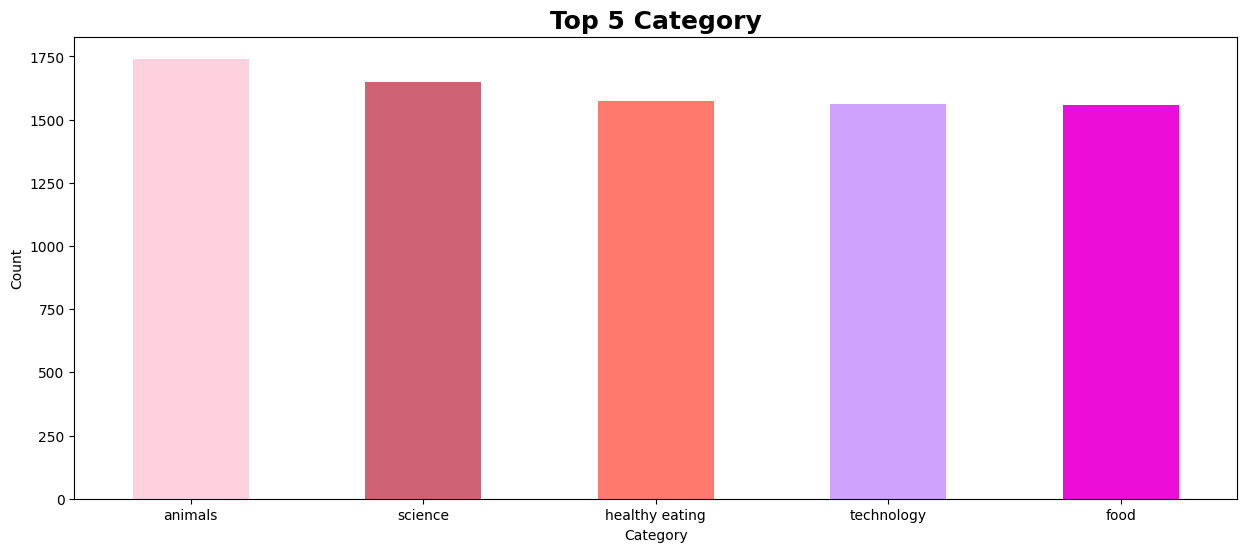

In [7]:
final_df.Category.value_counts().nlargest(5).plot.bar(figsize=(15,6), color=colors)
plt.title("Top 5 Category", weight='bold', fontsize=18)
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=0)

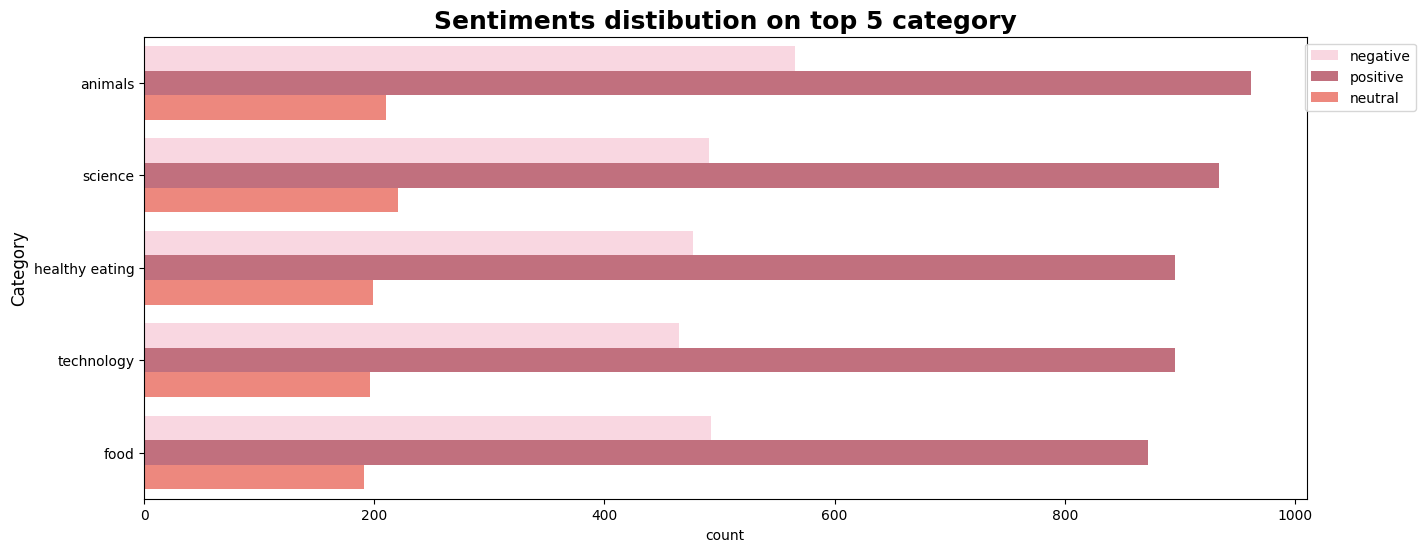

In [8]:
fig, ax = plt.subplots(figsize = ( 15 ,6 ))
sns.countplot( y='Category', data=final_df, hue='Sentiment',order=final_df['Category'].value_counts().iloc[:5].index ,palette=['#ffd1df','#cf6275','#ff796c'])
ax.set_ylabel( "Category",size=  12 )
ax.set_title( "Sentiments distibution on top 5 category" , size = 18, weight='bold' )
plt.legend(bbox_to_anchor=(1.1, 1.0))


#### The breakup of category

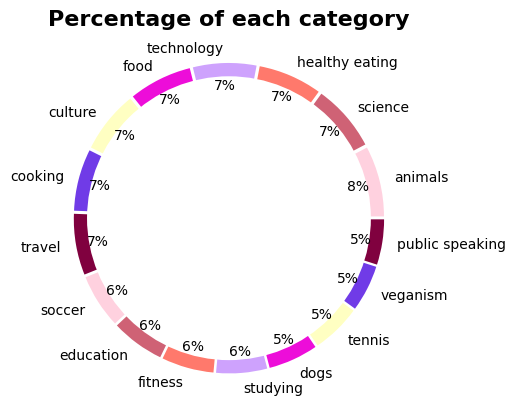

In [9]:
#explosion
explode = (0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05)
plt.pie(final_df.Category.value_counts(),labels=final_df.Category.value_counts().index,autopct='%.0f%%', 
        pctdistance=0.85, explode = explode, colors=colors)
plt.title("Percentage of each category", weight='bold', fontsize=16)
#draw circle
centre_circle = plt.Circle((0,0),0.96,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()



#### Exploring categorical variables

<AxesSubplot:xlabel='count', ylabel='Sentiment'>

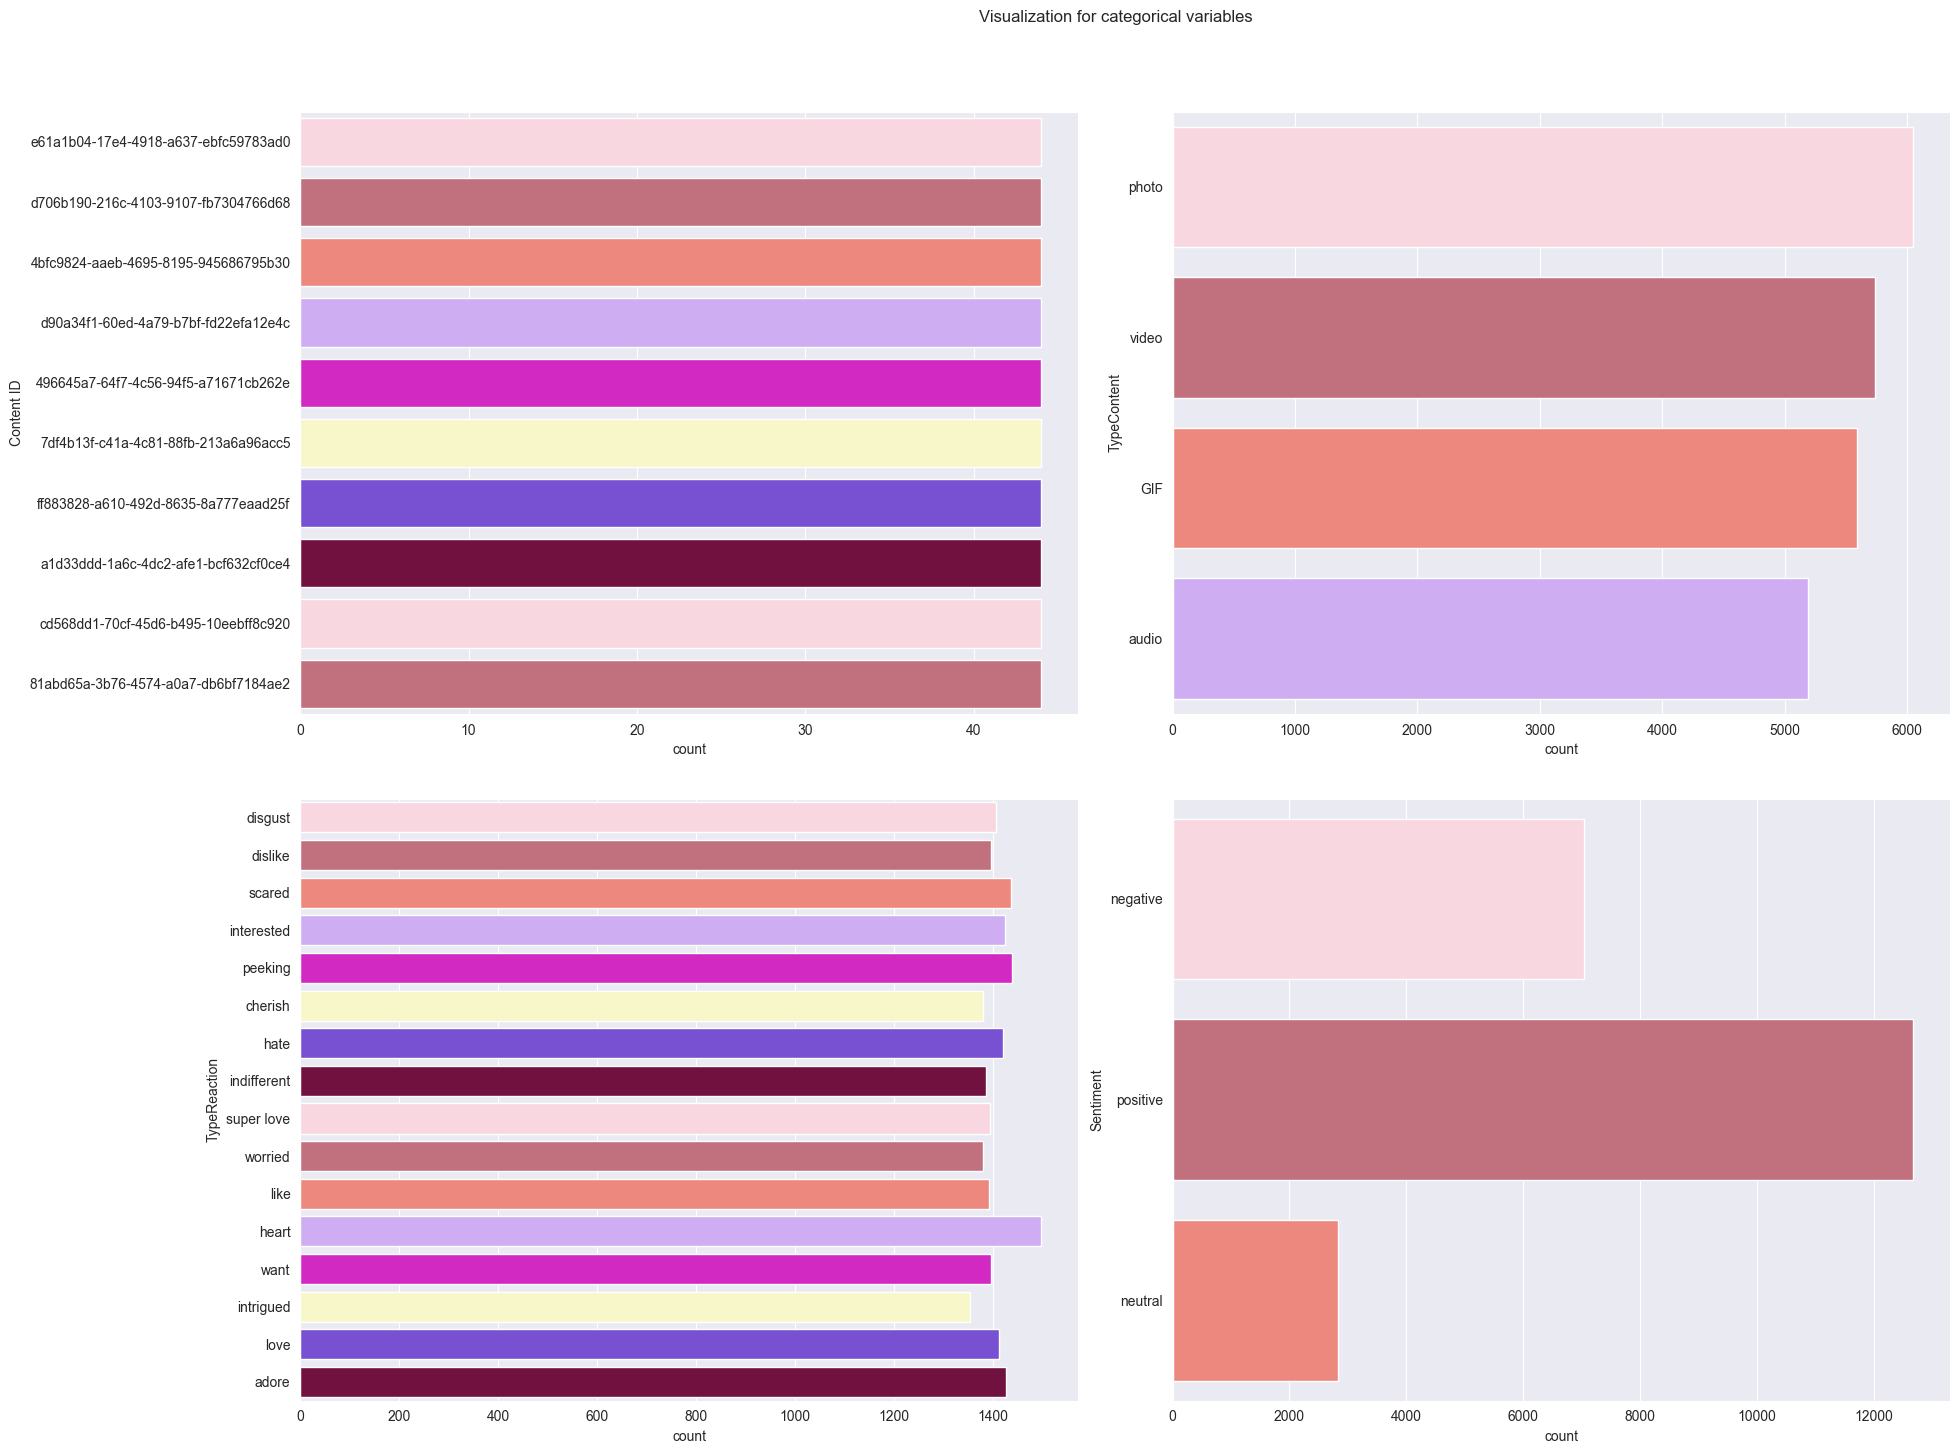

In [10]:
sns.set_style("darkgrid")
fig, axes = plt.subplots(2,2)
fig.suptitle('Visualization for categorical variables')
plt.gcf().set_size_inches(18, 15)
fig.tight_layout(pad=4.0)

sns.countplot(ax=axes[0,0], y = final_df['Content ID'], data=final_df,order=final_df['Content ID'].value_counts().iloc[:10].index, palette=colors)
sns.countplot(ax=axes[0,1], y = final_df['TypeContent'],data=final_df, palette=colors)
sns.countplot(ax=axes[1,0], y = final_df['TypeReaction'],data=final_df, palette=colors)
sns.countplot(ax=axes[1,1], y = final_df['Sentiment'],data=final_df, palette=colors)

#### Type of content in each category

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'animals'),
  Text(1, 0, 'cooking'),
  Text(2, 0, 'culture'),
  Text(3, 0, 'dogs'),
  Text(4, 0, 'education'),
  Text(5, 0, 'fitness'),
  Text(6, 0, 'food'),
  Text(7, 0, 'healthy eating'),
  Text(8, 0, 'public speaking'),
  Text(9, 0, 'science'),
  Text(10, 0, 'soccer'),
  Text(11, 0, 'studying'),
  Text(12, 0, 'technology'),
  Text(13, 0, 'tennis'),
  Text(14, 0, 'travel'),
  Text(15, 0, 'veganism')])

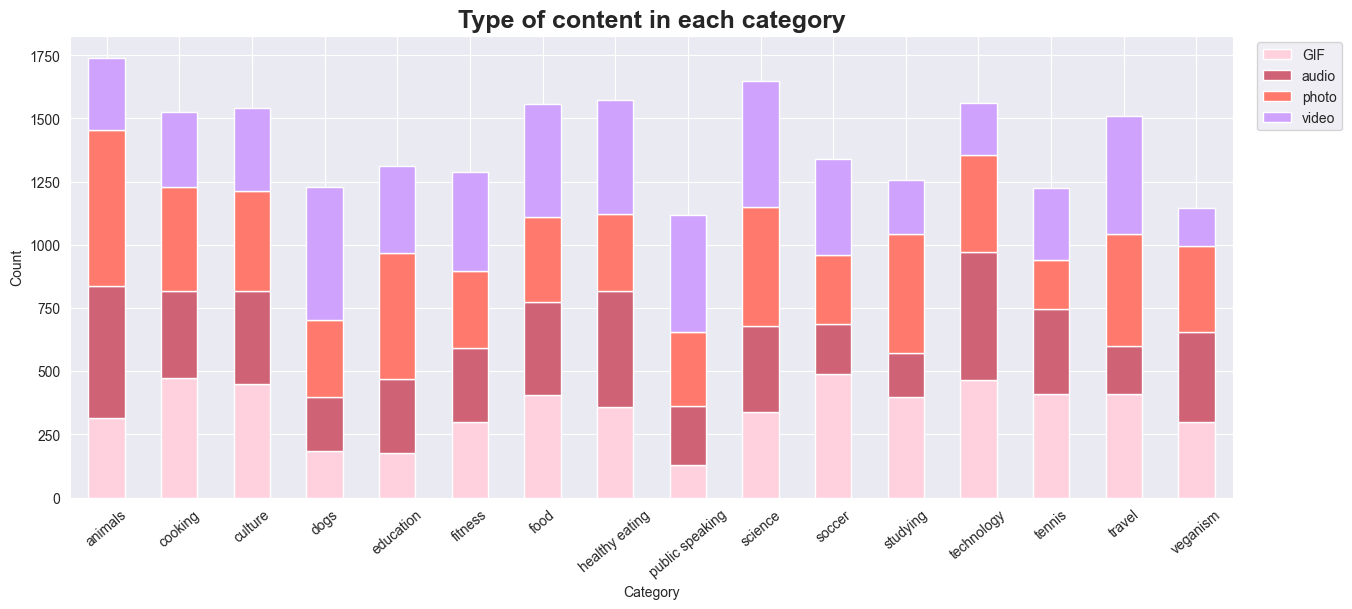

In [11]:
final_df.groupby('Category')['TypeContent'].value_counts().unstack(level=1).plot.bar(stacked=True, figsize=(15,6), color=colors)
plt.legend(bbox_to_anchor=(1.1, 1.0))
plt.title("Type of content in each category", weight='bold', fontsize=18)
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=40)

#### Type of reaction in each category

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'animals'),
  Text(1, 0, 'cooking'),
  Text(2, 0, 'culture'),
  Text(3, 0, 'dogs'),
  Text(4, 0, 'education'),
  Text(5, 0, 'fitness'),
  Text(6, 0, 'food'),
  Text(7, 0, 'healthy eating'),
  Text(8, 0, 'public speaking'),
  Text(9, 0, 'science'),
  Text(10, 0, 'soccer'),
  Text(11, 0, 'studying'),
  Text(12, 0, 'technology'),
  Text(13, 0, 'tennis'),
  Text(14, 0, 'travel'),
  Text(15, 0, 'veganism')])

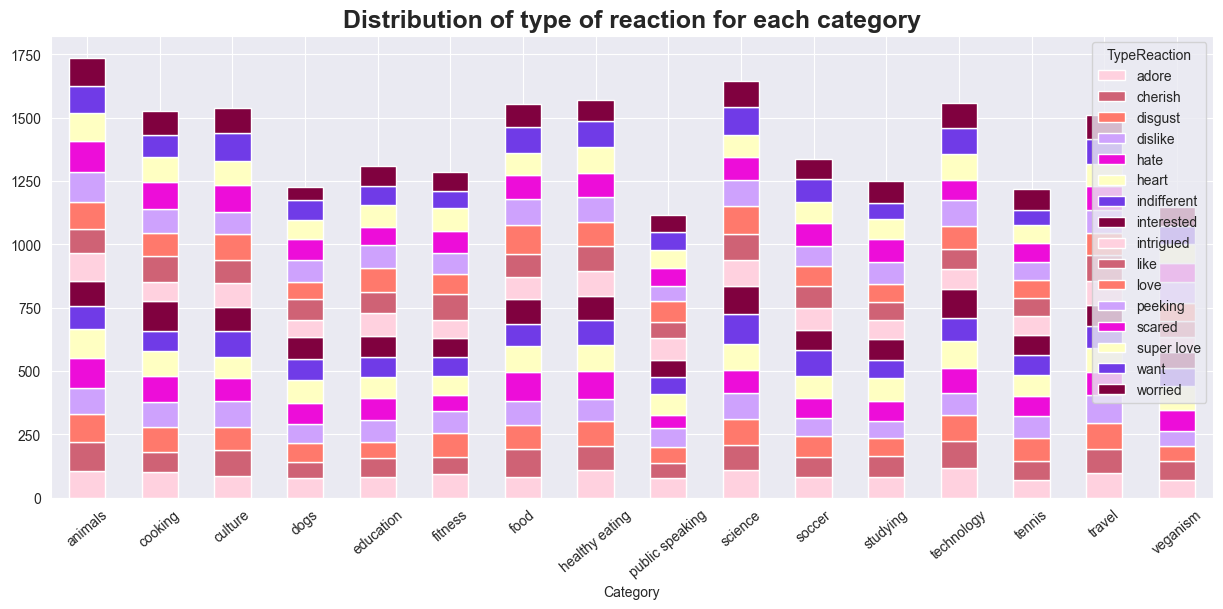

In [12]:
final_df.groupby('Category')['TypeReaction'].value_counts().unstack(level=1).plot.bar(stacked=True, figsize=(15,6), color=colors)
plt.title("Distribution of type of reaction for each category", weight='bold', fontsize=18)
plt.xlabel("Category")
plt.xticks(rotation=40)

#### Type of sentiment in each category

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'animals'),
  Text(1, 0, 'cooking'),
  Text(2, 0, 'culture'),
  Text(3, 0, 'dogs'),
  Text(4, 0, 'education'),
  Text(5, 0, 'fitness'),
  Text(6, 0, 'food'),
  Text(7, 0, 'healthy eating'),
  Text(8, 0, 'public speaking'),
  Text(9, 0, 'science'),
  Text(10, 0, 'soccer'),
  Text(11, 0, 'studying'),
  Text(12, 0, 'technology'),
  Text(13, 0, 'tennis'),
  Text(14, 0, 'travel'),
  Text(15, 0, 'veganism')])

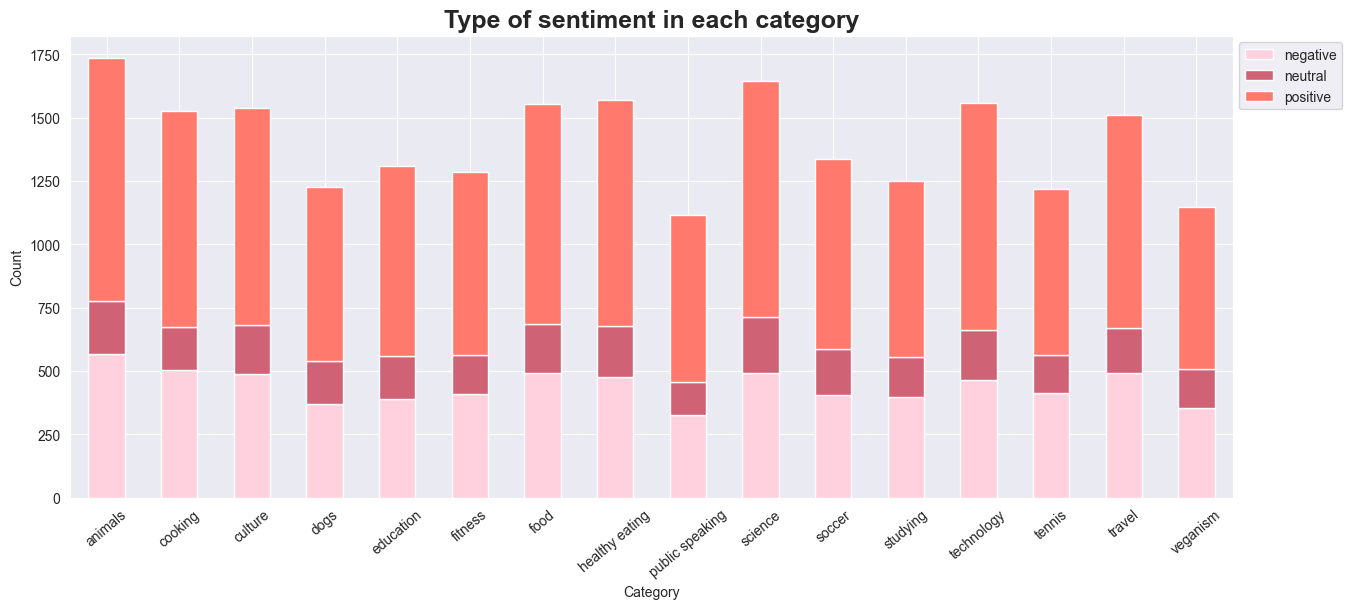

In [13]:
final_df.groupby('Category')['Sentiment'].value_counts().unstack(level=1).plot.bar(stacked=True, figsize=(15,6), color=colors)
plt.legend(bbox_to_anchor=(1.1, 1.0))
plt.title("Type of sentiment in each category", weight='bold', fontsize=18)
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=40)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'disgust'),
  Text(1, 0, 'hate'),
  Text(2, 0, 'dislike'),
  Text(3, 0, 'worried'),
  Text(4, 0, 'scared'),
  Text(5, 0, 'indifferent'),
  Text(6, 0, 'interested'),
  Text(7, 0, 'peeking'),
  Text(8, 0, 'intrigued'),
  Text(9, 0, 'like'),
  Text(10, 0, 'heart'),
  Text(11, 0, 'love'),
  Text(12, 0, 'cherish'),
  Text(13, 0, 'want'),
  Text(14, 0, 'adore'),
  Text(15, 0, 'super love')])

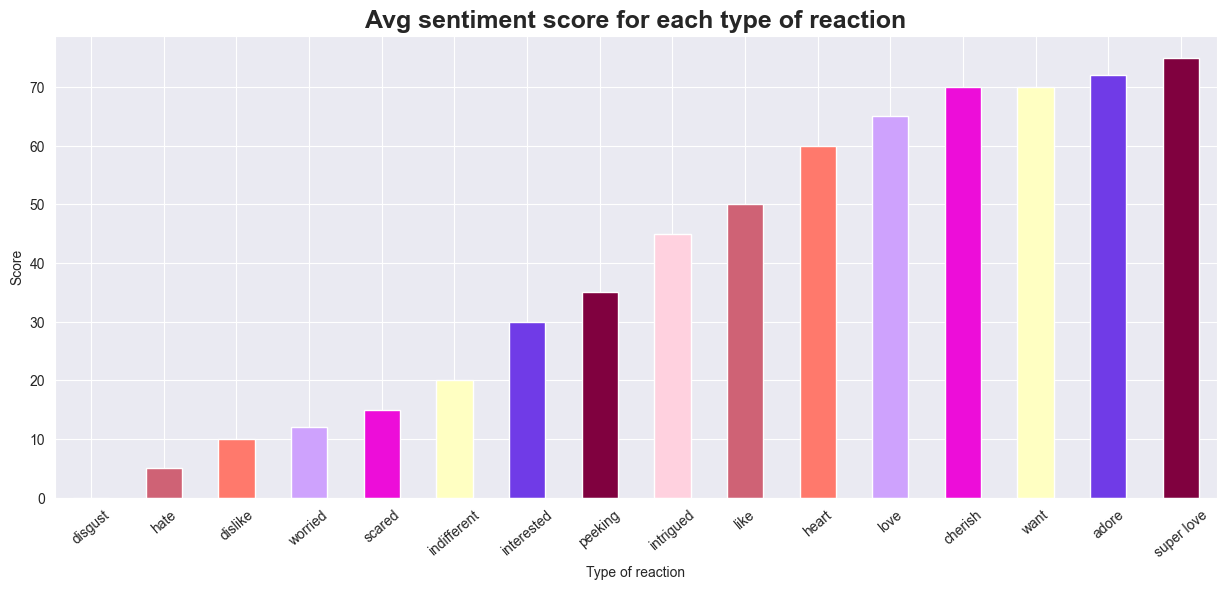

In [14]:
df_sentiment_score = final_df.groupby('TypeReaction')['Score'].mean().reset_index()
df_sentiment_score.sort_values('Score').plot.bar(figsize=(15,6), x='TypeReaction', y='Score', color=colors, legend=False)
plt.title("Avg sentiment score for each type of reaction", weight='bold', fontsize=18)
plt.xlabel("Type of reaction")
plt.ylabel("Score")
plt.xticks(rotation=40)

##### Exploring Datetime column

In [15]:
final_df["Datetime"].min(), final_df["Datetime"].max()

(Timestamp('2020-06-18 08:07:22'), Timestamp('2021-06-18 08:30:29'))

In [16]:
 final_df["Datetime"].max()-final_df["Datetime"].min()

Timedelta('365 days 00:23:07')

In [17]:
final_df['Hours'] = final_df['Datetime'].dt.hour
final_df['MonthN'] =final_df['Datetime'].dt.month_name()
final_df['Year'] = final_df['Datetime'].dt.year
final_df['Date'] = final_df['Datetime'].dt.day
final_df['DayN'] = final_df['Datetime'].dt.day_name()
final_df.sample(3)

,Content ID,TypeContent,Category,TypeReaction,Datetime,Score,Sentiment,Hours,MonthN,Year,Date,DayN
2965,1beeffff-f261-435f-a109-6fafe46669d4,photo,public speaking,love,2021-02-19 00:25:37,65.0,positive,0.0,February,2021.0,19.0,Friday
716,a2ff9bf2-1fa6-4001-9566-f597f8e754ef,video,food,intrigued,2020-09-03 17:05:32,45.0,positive,17.0,September,2020.0,3.0,Thursday
1841,3724de8a-ec2f-4021-a3f1-605d551da9d0,video,culture,want,2020-07-10 03:28:14,70.0,positive,3.0,July,2020.0,10.0,Friday


In [18]:
final_df.dropna(axis=0,inplace=True)

Text(0.5, 1.0, 'Count of Posts for each month')

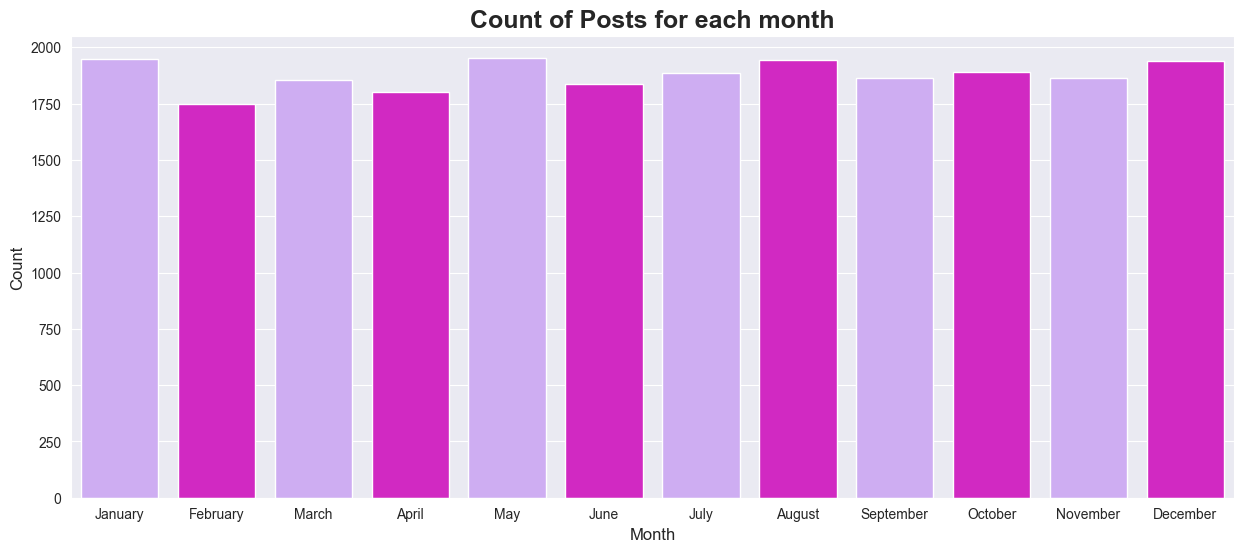

In [26]:
m = ["January", "February", "March", "April", "May",'June', 'July','August','September','October','November','December']
fig, ax = plt.subplots(figsize = ( 15 ,6 ))
sns.countplot(x=sorted(final_df.MonthN,key=m.index), data=final_df, palette=['#cea2fd','#ed0dd9'])
ax.set_xlabel( "Month" , size = 12 )
ax.set_ylabel( "Count",size=  12 )
ax.set_title( "Count of Posts for each month" , size = 18, weight='bold' )

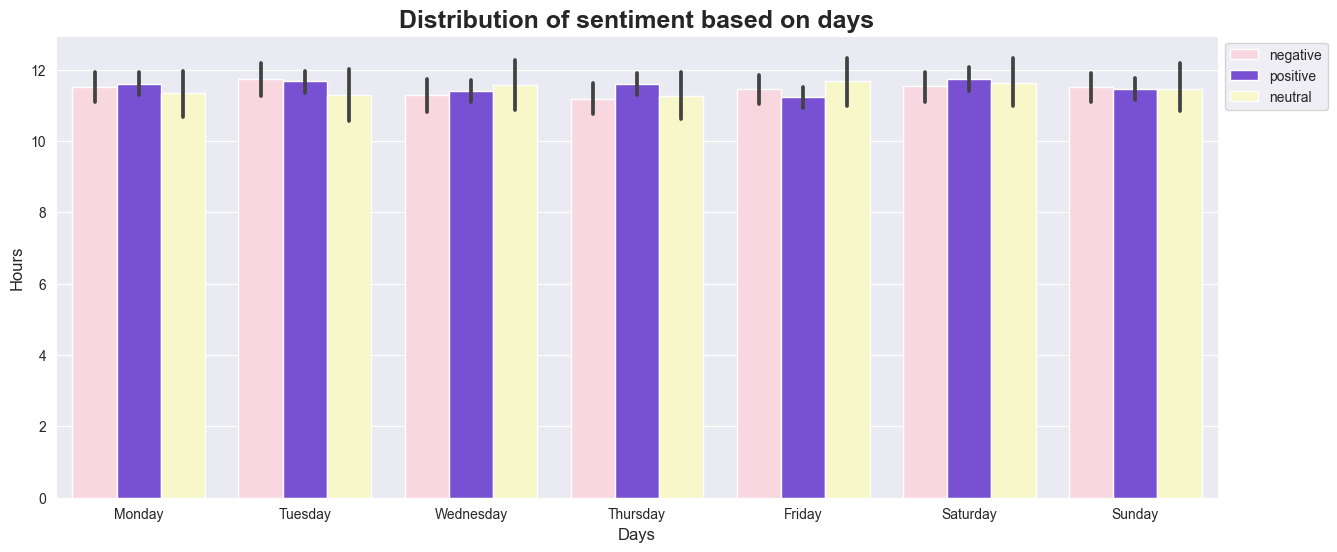

In [22]:
m = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday",'Saturday', 'Sunday']
fig, ax = plt.subplots(figsize = ( 15 ,6 ))
sns.barplot(x=sorted(final_df.DayN,key=m.index), y='Hours', data=final_df, hue='Sentiment', palette=['#ffd1df','#703be7','#ffffc2'])
ax.set_xlabel( "Days" , size = 12 )
ax.set_ylabel( "Hours",size=  12 )
ax.set_title( "Distribution of sentiment based on days" , size = 18, weight='bold' )
plt.legend(bbox_to_anchor=(1.1, 1.0))

In [23]:
final_df['Day/Night']= np.where((final_df['Hours']>=0)&(final_df['Hours']<=12),'AM','PM')

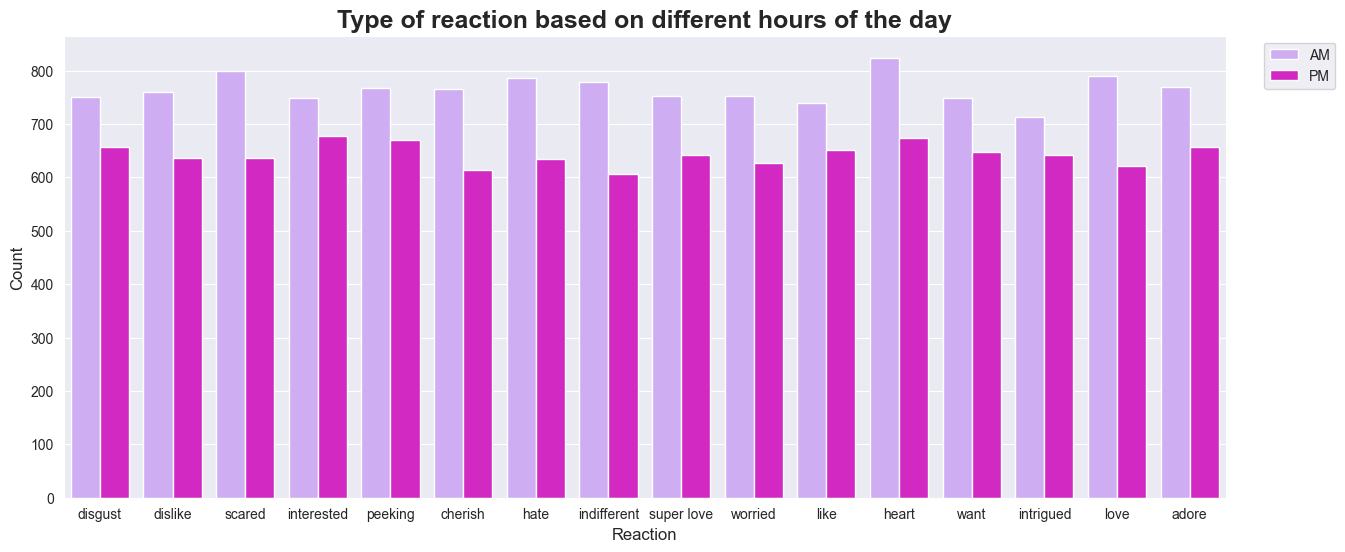

In [24]:
fig, ax = plt.subplots(figsize = ( 15 ,6 ))
sns.countplot(x='TypeReaction', data=final_df, hue='Day/Night', palette=['#cea2fd','#ed0dd9'])
ax.set_xlabel( "Reaction" , size = 12 )
ax.set_ylabel( "Count",size=  12 )
ax.set_title( "Type of reaction based on different hours of the day" , size = 18, weight='bold' )
plt.legend(bbox_to_anchor=(1.1, 1.0))

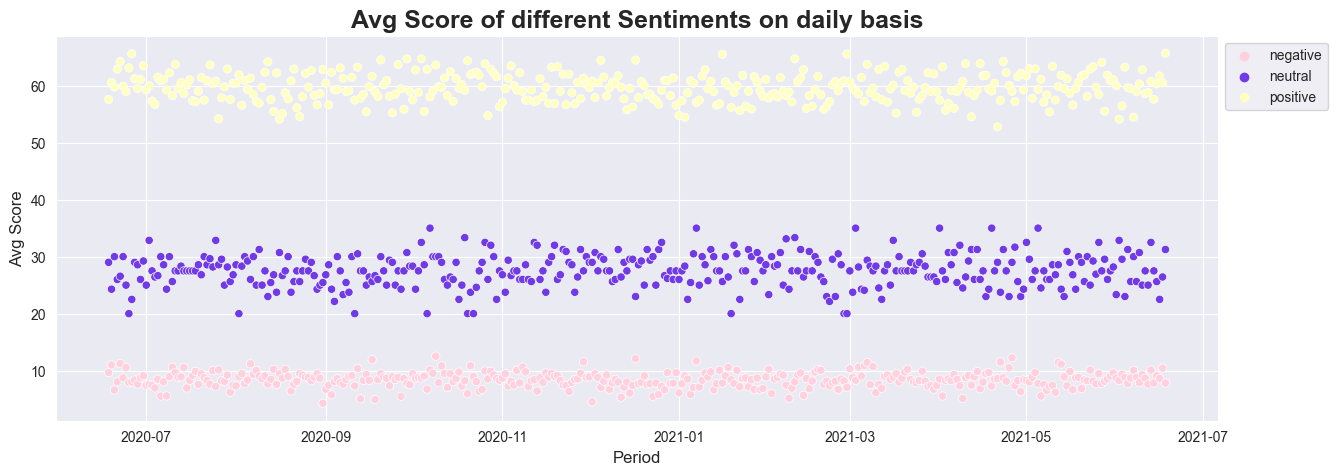

In [25]:
add_features = [pd.Grouper(key="Datetime", freq="1D"), "Sentiment"]
df = final_df.groupby(by=add_features).agg({"Score":'mean',"Content ID":"count"}).reset_index()

fig, ax = plt.subplots(figsize = ( 15 ,5 ))
sns.scatterplot(ax=ax,data=df, x='Datetime', y='Score', hue='Sentiment',palette=['#ffd1df','#703be7','#ffffc2'])
ax.set_xlabel( "Period" , size = 12 )
ax.set_ylabel( "Avg Score",size=  12 )
ax.set_title( "Avg Score of different Sentiments on daily basis" , size = 18, weight='bold' )
plt.legend(bbox_to_anchor=(1.1, 1.0))
